In [3]:
from matplotlib.colors import LinearSegmentedColormap


#color palette for plotting, colors as in make_behavior_ethogram
palette = ["coral",     # forward
           "lightblue", # reverse
           "darkgreen", # turn
           "purple","red", "yellow", "black", "pink"]    # pause
cmap = LinearSegmentedColormap.from_list("behavior", palette, N=len(palette))


from load_data_fncs import load_all_data, get_exp_dates
from analyse_rslds_utils import make_behavior_decoder, input_slds
import copy
import socket
import os
import pickle 
# import ssm #need to/ keep 
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# T = 1599
# full_traces, full_neural_labels, full_beh_classification, full_beh_data = load_all_data()

# velocity_og = np.array([full_beh_data[i]["velocity"][0:1599] for i in range(len(full_beh_data))])
# acceleration_og = np.array([full_beh_data[i]["acceleration"][1:1600] for i in range(len(full_beh_data))])
# head_curvature_og = np.array([full_beh_data[i]["head_angle"][0:1599] for i in range(len(full_beh_data))])
# worm_curvature_og = np.array([full_beh_data[i]["worm_curvature"][0:1599] for i in range(len(full_beh_data))])
# pumping_og = np.array([full_beh_data[i]["pumping"][0:1599] for i in range(len(full_beh_data))])
# body_angle_mag_og = np.array([full_beh_data[i]["body_angle_mag"][0:1599] for i in range(len(full_beh_data))])
# midlines_og =  np.array([full_beh_data[i]["midlines"][0:1599] for i in range(len(full_beh_data))])
# body_angles_og =  np.array([full_beh_data[i]["body_angles"][0:1599] for i in range(len(full_beh_data))])

# velocity = copy.deepcopy(velocity_og)
# acceleration = copy.deepcopy(acceleration_og)
# head_curvature = copy.deepcopy(head_curvature_og)
# worm_curvature = copy.deepcopy(worm_curvature_og)
# pumping = copy.deepcopy(pumping_og)
# body_angle_mag =copy.deepcopy(body_angle_mag_og)
# midlines =copy.deepcopy( midlines_og)
# body_angles = copy.deepcopy(body_angles_og)
# z = [beh_classification["is_fwd"][0:1599]+ 2*beh_classification["is_rev"][0:1599]+ 4*beh_classification["is_pause"][0:1599]+3*beh_classification["is_turn"][0:1599]-1 for beh_classification in full_beh_classification]



# z_norm = np.array(z, np.float64)
# velocity -= velocity.mean()
# velocity /= velocity.std()
# acceleration -= acceleration.mean()
# acceleration /= acceleration.std()
# worm_curvature -= worm_curvature.mean()
# worm_curvature /= worm_curvature.std()
# z_norm -= z_norm.mean()
# z_norm /= z_norm.std()
# z_flat = np.array(z).flatten()


[]
NOT using body angle mag for curvature


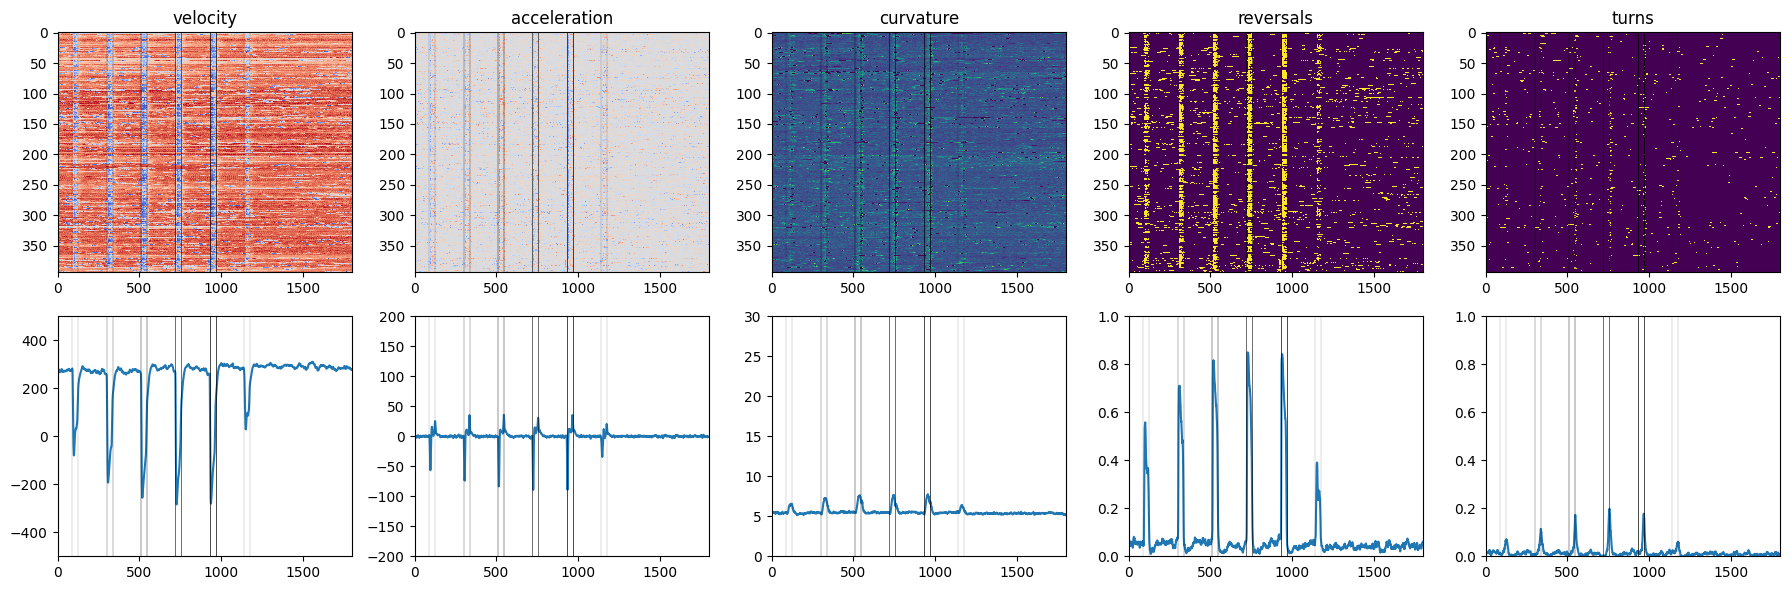

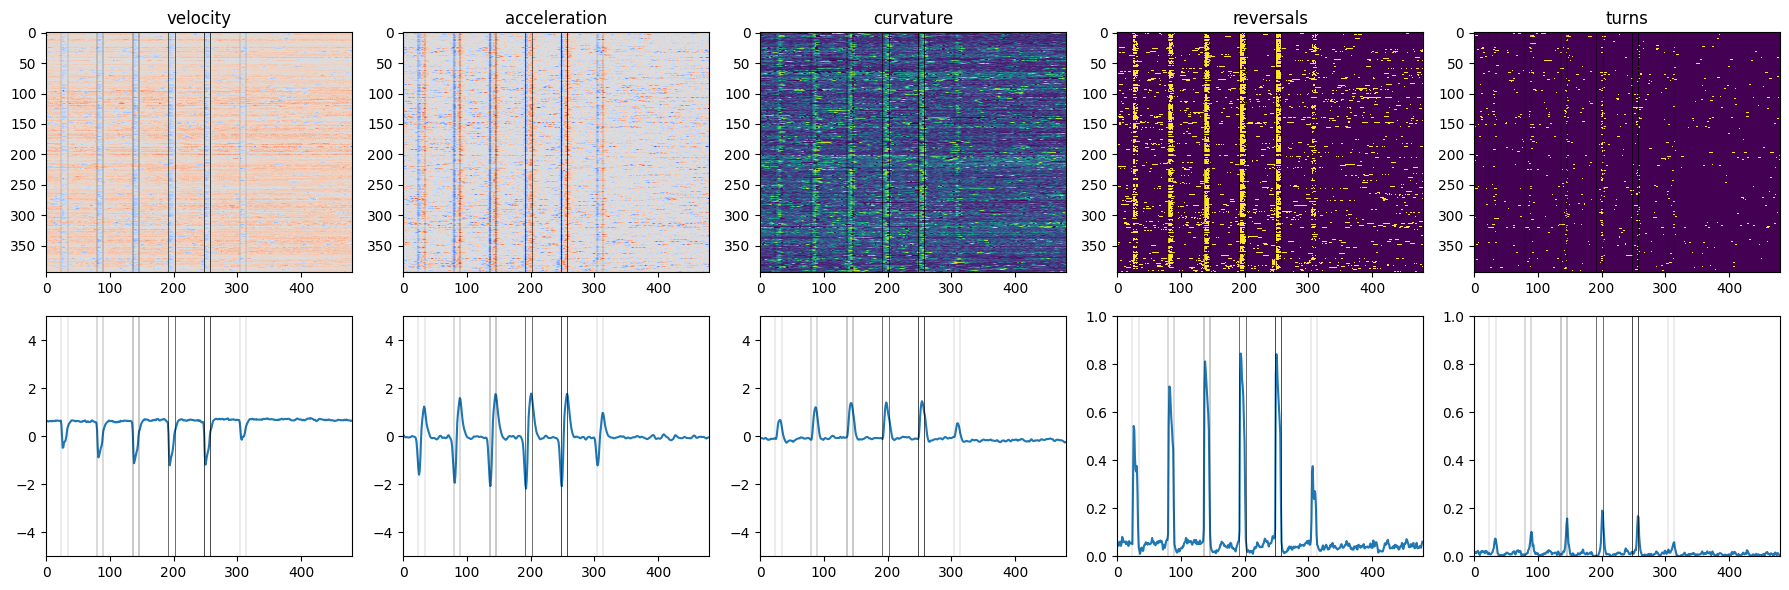

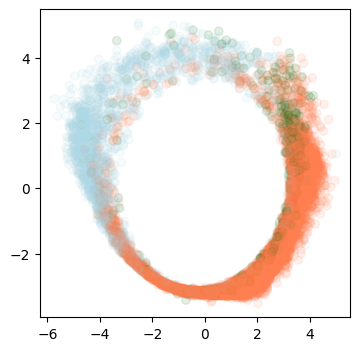

In [4]:
from load_and_process_FB_data_fncs import load_data, reformat_data,plot_data,  analyze_data, replace_outliers_exp
# experiment = "duty_cycle"
# condition = "exp"
# neuron = "AVA"
# path = "/Users/friederikebuck/beh_analysis_results/csv/_Aim1_AVA_duty_cycle/"


# experiment = "duty_cycle"
# condition = "exp"
# neuron = "AIB"
# path = "/Users/friederikebuck/beh_analysis_results/csv/_AIBC-3_Aim1_AIB_duty_cycle/"


experiment = "duty_cycle"
condition = "exp"
neuron = "RIM"
path = "/Users/friederikebuck/beh_analysis_results/csv/_Aim1_RIM_duty_cycle/"
###using body angle mag;
# outlier speepraeted determien for neg and pos
#exp curve 0 is nan and interpolating between 

exp_data = load_data(experiment, condition, neuron, path = path)


exp_vel, exp_acc, exp_curve, exp_rev, exp_pause, exp_turn, exp_body_angle_mag  = replace_outliers_exp(exp_data, exp_data[0].shape)

exp_onsets = plot_data(exp_vel, exp_acc, exp_curve, exp_rev, exp_turn, experiment, fps=6)

# plot_data(exp_vel, exp_acc, exp_curve, exp_rev, exp_turn, experiment, fps=6)
# resampled_vel, resampled_acc, resampled_curve, resampled_rev, resampled_turn = reformat_data(exp_vel, exp_acc, exp_curve, exp_behaviors, turns, pauses, plot=True, sep_pos_neg_resample = False)
# resampled_vel, resampled_acc, resampled_curve, resampled_rev, resampled_turn = reformat_data(exp_vel, 
#                                                                                              exp_acc,
#                                                                                              exp_curve,
#                                                                                              exp_rev,
#                                                                                              exp_turn, 
#                                                                                              exp_pause,
#                                                                                              z_flat,
#                                                                                              velocity, 
#                                                                                              acceleration, 
#                                                                                              worm_curvature,
#                                                                                             #  X_all,  
#                                                                                              plot=True, 
#                                                                                              sep_pos_neg_resample = True)

pickle_fname = f"/Users/friederikebuck/Downloads/worm notes/processed_checkpts/aim1_FB_beh_{neuron}_{condition}_{experiment}_phase_features_exp.pickle"
with open(pickle_fname, "rb") as handle:
    resampled_features = pickle.load(handle) 
    
resampled_vel, resampled_acc, resampled_curve, resampled_rev, resampled_turn, behaviors_all, inferred_phases_all, inferred_rad_all = resampled_features

onsets = plot_data(resampled_vel, resampled_acc, resampled_curve, resampled_rev, resampled_turn, experiment, fps=1.6, orig = False)

times = onsets
# inferred_phases, final_behaviors, final_behaviors_all, inferred_phases_all, inferred_rad_all, behaviors_all, inferred_rad, initial_behaviors, initial_cts_beh, X_all_LSTM = analyze_data(resampled_vel, resampled_acc, resampled_curve, resampled_rev, resampled_turn, times, model_beh_directed, z_norm,input_stats,  z, lag=16, inclusion_thresh = 2, model_type="ff",normalize=False, remove_revs=False)


fig,ax = plt.subplots(figsize=(4,4))
donut_x = inferred_rad_all*np.cos(inferred_phases_all)
donut_y = inferred_rad_all*np.sin(inferred_phases_all)

ax.scatter(donut_x[::10], donut_y[::10], c=behaviors_all[::10], cmap=cmap, vmin=-1, vmax=7, alpha = 0.1)


# pickle_fname = f"/Users/friederikebuck/Downloads/worm notes/processed_checkpts/aim1_FB_beh_{neuron}_{condition}_{experiment}_features_exp.pickle"
# with open(pickle_fname, "wb") as handle:
#     pickle.dump([worm_angles, worm_radii], handle) 

In [8]:
exp_rev.shape
print(resampled_acc.shape)

(394, 480)


gap 2 3 1
gap 3 4 1
gap 4 5 1
gap 5 6 1
gap 6 7 1
gap 7 8 1
gap 8 942 934
gap 942 943 1
gap 943 944 1
gap 944 945 1
gap 945 946 1
gap 946 947 1
gap 947 948 1
gap 948 949 1
gap 949 950 1
gap 950 951 1
gap 951 952 1
gap 952 953 1
gap 953 954 1
gap 954 955 1
gap 955 956 1
gap 956 977 21
gap 977 978 1
gap 978 979 1
gap 979 980 1
gap 980 981 1
gap 981 1022 41
gap 1022 1023 1
gap 1023 1024 1
gap 1024 1025 1
gap 1025 1035 10
gap 1035 1036 1
gap 1036 1037 1
gap 1037 1038 1
gap 1038 1039 1
gap 1039 1040 1
gap 1040 1102 62
gap 1102 1103 1
gap 1103 1104 1
gap 1104 1105 1
gap 1105 1106 1
gap 1106 1107 1
gap 1107 1108 1
gap 1108 1109 1
gap 1109 1110 1
gap 1110 1111 1
gap 1111 1193 82
gap 1193 1194 1
gap 1194 1195 1
gap 1195 1196 1
gap 1196 1197 1
gap 1197 1246 49
gap 1246 1247 1
gap 1247 1248 1
gap 1248 1593 345
gap 1593 1594 1
gap 1594 1595 1
gap 1595 1602 7
gap 1602 1603 1
gap 1603 1604 1
gap 1604 1605 1
gap 1605 1606 1
gap 1606 1607 1
gap 1607 1929 322
gap 1929 1930 1
gap 1930 1931 1
gap 1931 19

Text(0.5, 1.0, 'Interpolated FWDS with Reversals Highlighted')

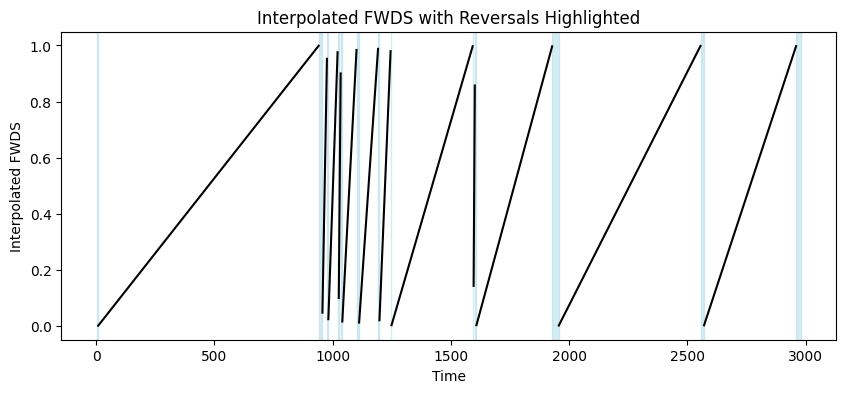

In [47]:
import numpy as np
def event_interpolation_fraction(events):
    """
    Input: 1D np.array with 1 where event occurs, 0 elsewhere.
    Output: 
      - -1 at event indices
      - linearly interpolated fraction of time to next event for other positions
    """
    # events = np.asarray(np.logical_not(events))
    events = np.asarray(events)
    result = np.full_like(events, np.nan, dtype=float)
    event_idxs = np.where(events == 1)[0]

    padded = np.pad(events, (1, 1), mode='constant')
    diff = np.diff(padded)

    starts = np.where(diff == 1)[0]
    ends = np.where(diff == -1)[0]
    
    if len(event_idxs) == 0:
        return result  # no events, return NaNs

    # # Set -1 where events occur
    # result[event_idxs] = -1.0

    # Loop over event pairs to fill in between
    for i in range(len(event_idxs) - 1):
        start = event_idxs[i]
        end = event_idxs[i + 1]
        gap = end - start
        for j in range(1, gap):
            frac = j / gap  # fraction toward the next event
            result[start + j] = frac
        print("gap",start, end, gap )

    # # Optionally, fill leading segment before first event with 0s
    # if event_idxs[0] > 0:
    #     result[:event_idxs[0]] = np.linspace(0, 1, event_idxs[0], endpoint=False)

    # # Optionally, fill trailing segment after last event with 0s
    # if event_idxs[-1] < len(events) - 1:
    #     result[event_idxs[-1] + 1:] = 0.0

    return result

def get_interpolated_time_since_last_reversal(rev_bin):
    n_frames, n_tracks = rev_bin.shape
    interpolated_fwd_time = np.zeros_like(rev_bin)
    for track in range(n_tracks):
        interpolated_fwd_time[:,track] = event_interpolation_fraction(rev_bin[:,track])
        
    return interpolated_fwd_time

# from 
from predict_latency_prob_from_features_donut import resample_2d, fit_visualize_model_regression, feature_all_to_resampled
from sklearn.linear_model import LogisticRegression, Lasso, LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
######see if can predict phase from time_since_last_rev 
###need to get phase interpolated or somte 
random_state = 30
test_size = 0.3
# interpolated_fwds = get_interpolated_time_since_last_reversal(exp_rev.flatten())
interpolated_fwds = event_interpolation_fraction(exp_rev.flatten()[2745:5745])
# Example data
fig, ax = plt.subplots(figsize=(10, 4))
# ax.plot(interpolated_fwds.flatten()[2745:3745], label='Interpolated FWDS', color='black')
ax.plot(interpolated_fwds.flatten(), label='Interpolated FWDS', color='black')

# Highlight background where rev_bin == 1
# rev_indices = np.where(exp_rev.flatten()[2745:3745] == 1)[0]
rev_indices = np.where(exp_rev.flatten()[2745:5745].flatten() == 1)[0]
print(rev_indices)
# Group consecutive indices to draw continuous spans
from itertools import groupby
from operator import itemgetter

for k, g in groupby(enumerate(rev_indices), lambda x: x[0] - x[1]):
    group = list(map(itemgetter(1), g))
    start, end = group[0], group[-1]
    ax.axvspan(start, end, color='lightblue', alpha=0.5)

ax.set_xlabel('Time')
ax.set_ylabel('Interpolated FWDS')
ax.set_title('Interpolated FWDS with Reversals Highlighted')
# plt.legend()
# plt.tight_layout()
# plt.show()




Text(0.5, 1.0, 'Interpolated FWDS with Reversals Highlighted')

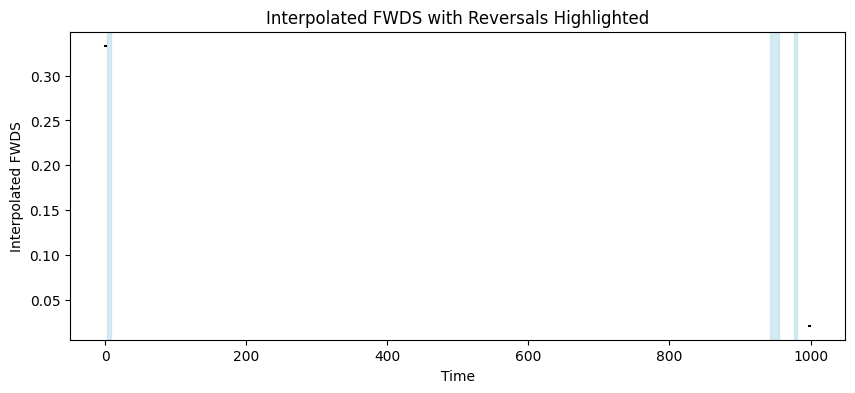

gap 945 946 1
gap 946 947 1
gap 947 948 1
gap 948 949 1
gap 949 1943 994
gap 1943 1944 1
gap 1944 1945 1
gap 1945 1946 1
gap 1946 1947 1
gap 1947 1948 1
gap 1948 1949 1
gap 1949 1950 1
gap 1950 1951 1
gap 1951 1968 17
gap 1968 1969 1
gap 1969 1970 1
gap 1970 1971 1
gap 1971 1972 1
gap 1972 1997 25
gap 1997 1998 1
gap 1998 1999 1
gap 1999 2000 1
gap 2000 2001 1
gap 2001 2002 1
gap 2002 2003 1
gap 2003 2004 1
gap 2004 2005 1
gap 2005 2006 1
gap 2006 2013 7
gap 2013 2014 1
gap 2014 2015 1
gap 2015 2016 1
gap 2016 2017 1
gap 2017 2018 1
gap 2018 2019 1
gap 2019 2020 1
gap 2020 2021 1
gap 2021 2022 1
gap 2022 2054 32
gap 2054 2055 1
gap 2055 2056 1
gap 2056 2057 1
gap 2057 2058 1
gap 2058 2059 1
gap 2059 2060 1
gap 2060 2061 1
gap 2061 2062 1
gap 2062 2063 1
gap 2063 2064 1
gap 2064 2065 1
gap 2065 2066 1
gap 2066 2067 1
gap 2067 2068 1
gap 2068 2069 1
gap 2069 2070 1
gap 2070 2071 1
gap 2071 2072 1
gap 2072 2108 36
gap 2108 2109 1
gap 2109 2110 1
gap 2110 2111 1
gap 2111 2112 1
gap 2112 21

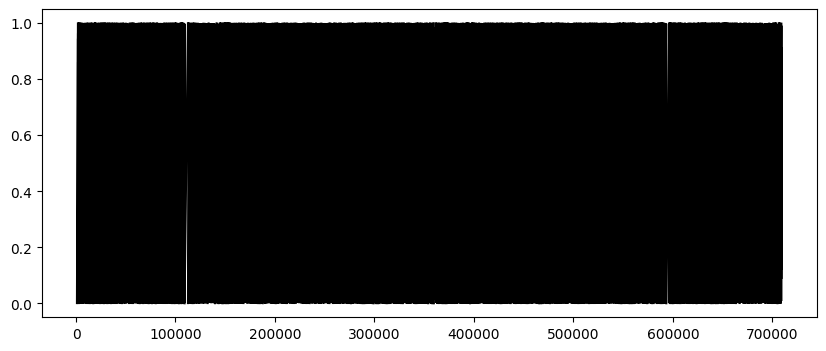

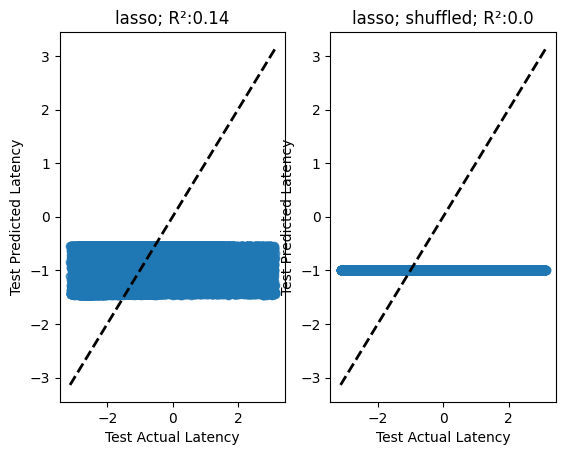

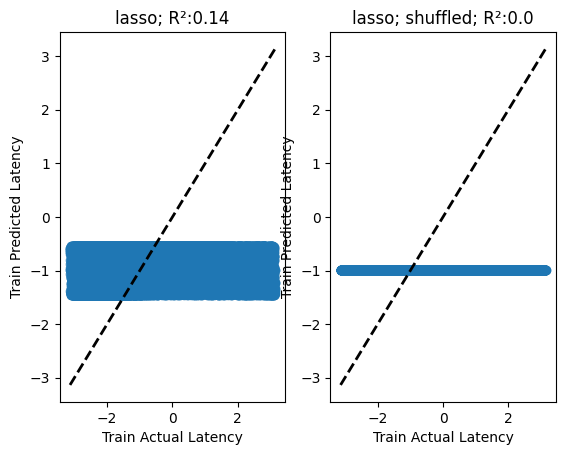

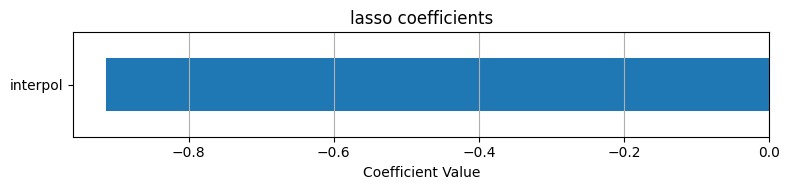

In [53]:


from predict_latency_prob_from_features_donut import resample_2d, fit_visualize_model_regression, feature_all_to_resampled
from sklearn.linear_model import LogisticRegression, Lasso, LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
######see if can predict phase from time_since_last_rev 
###need to get phase interpolated or somte 
random_state = 30
test_size = 0.3
# interpolated_fwds = get_interpolated_time_since_last_reversal(exp_rev.flatten())
interpolated_fwds = event_interpolation_fraction(exp_rev.flatten())
# Example data
fig, ax = plt.subplots(figsize=(10, 4))
# ax.plot(interpolated_fwds.flatten()[2745:3745], label='Interpolated FWDS', color='black')
ax.plot(interpolated_fwds.flatten(), label='Interpolated FWDS', color='black')

# Highlight background where rev_bin == 1
# rev_indices = np.where(exp_rev.flatten()[2745:3745] == 1)[0]
rev_indices = np.where(exp_rev.flatten().flatten() == 1)[0]
print(rev_indices)


n_tracks, n_frames_exp = exp_rev.shape



phase_resampled = feature_all_to_resampled(inferred_phases_all, n_tracks)
exp_phase_high_fps = resample_2d(phase_resampled, target_fps=6, original_fps=1.6)
Y = exp_phase_high_fps.flatten()
X = interpolated_fwds.flatten()

non_nan_is = np.argwhere(np.logical_and(np.logical_not(np.isnan(X)), np.logical_not(np.isnan(Y)))).flatten()
X = X[non_nan_is]
X = X.reshape(-1, 1)
Y = Y[non_nan_is]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)


alphas = np.logspace(-4, 2, 20)
model_label= f"lasso"
# lasso = Lasso(max_iter=10000)
model = LinearRegression()
model.fit(X_train, y_train)
n_timesteps = 1
fit_visualize_model_regression(model, model_label, np.array(["interpol"]), X_train, X_test, y_train, y_test, n_timesteps, feature_names_ordered =  np.array(["interpol"]))


In [52]:
###
def create_half_gaussian_kernel(n_timesteps, std):
    """Return a normalized half-Gaussian kernel."""
    t = np.arange(n_timesteps)
    kernel = np.exp(-0.5 * (t / std) ** 2)
    return kernel / kernel.sum()

def make_weighted_features_2d(xs, kernel):
    """
    xs: (n_timepoints, n_features)
    kernel: (n_timesteps,)
    Returns:
        weighted sum features of shape (n_timepoints - n_timesteps + 1, n_features)
    """
    n_timepoints, n_features = xs.shape
    k = len(kernel)
    padded = np.pad(xs, ((k - 1, 0), (0, 0)), mode='constant')  # pad time axis
    
    # Strided sliding window: shape (n_timepoints, n_timesteps, n_features)
    windows = np.lib.stride_tricks.sliding_window_view(padded, window_shape=(k, xs.shape[1]))[:, 0]
    
    # Apply kernel over time axis (axis=1)
    weighted = (windows * kernel[::-1, np.newaxis]).sum(axis=1)
    return weighted

n_timesteps = 10
std = n_timesteps / 2
kernel = create_half_gaussian_kernel(n_timesteps, std)
                                     
                                     
phase_resampled = feature_all_to_resampled(inferred_phases_all, n_tracks)
radii_resampled = feature_all_to_resampled(inferred_rad_all, n_tracks) 
onset = resampled_onset-1
# X_donut_stim = np.concatenate([phase_resampled[:, resampled_onset, None] ,  radii_resampled[:, resampled_onset, None] ], axis = 1)
X_donut_stim = np.concatenate([phase_resampled[:, None] ,  radii_resampled[:, None] ], axis = 1)
X_feat = make_weighted_features_2d(X_donut_stim, kernel)
X_feat = X_feat[:, onset]
for i, (resampled_onset, exp_onset) in enumerate(zip(resampled_onsets, exp_onsets)): 
        
    Y_latency = latency_to_reversal(exp_rev, exp_onset, max_latency = 6*durations[i]+1)/6 # nan where not 
    no_rev_at_onset = Y_latency!=0
    Y_prob = np.logical_not(np.isnan(Y_latency[no_rev_at_onset]))# classfy y/n did rev happen
    X_prob = copy.deepcopy(X_feat[no_rev_at_onset])
            

    ys_trimmed = ys[n_timesteps - 1:]
    
    # Fit model
    model = Ridge()
    model.fit(X_feat, ys_trimmed)
    preds = model.predict(X_feat)



n_timesteps 459
n_timesteps 459


NameError: name 'resampled_onset' is not defined